# SBRC2022

<div align="justify"> O objetivo deste notebook é apresentar exemplos de utilização de modelos de Aprendizado de Máquina aplicado aos problemas de redes de computadores. Iremos tratar especificamente de Classificação de Tráfego, indentificando os diveros tipos  de tráfego baseado nas medições da rede. Para isto iremos utilizar a linguagem Python com as bibliotecas NumPy, Pandas e Scikit learn. </div>

Esse Notebook aboradará os seguintes passos:
    <ul>
    <li>Preparação dos Dados</li>
    <li>Definição das Classes</li>
    <li>Classificação com Modelos AM</li>
    <li>Conclusão</li>



## Conectar Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls 'drive/MyDrive/Doutorado/Minicurso'

'Classificação de Tráfego.ipynb'
'Classifications_Models-Rolling Windows.ipynb'
'Cópia de Classificação de Tráfego.ipynb'
 dataset_classificacao.csv
 dataset_sdn.csv
 DDoS_Detection.ipynb
 filtered_dataset_classificacao.csv
 modelo.mlp
 Untitled0.ipynb


In [3]:
path_dataset = 'drive/MyDrive/Doutorado/Minicurso/dataset_classificacao.csv'
path_dataset_filtered = 'drive/MyDrive/Doutorado/Minicurso/filtered_dataset_classificacao.csv'
path_model_mlp = 'drive/MyDrive/Doutorado/Minicurso/modelo.mlp'

## Importar Bibliotecas

In [4]:
#libraries for data manipulation
import numpy as np
import pandas as pd

#Models for Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#libraries for selecting features and parameters
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#libraries for validation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, make_scorer
from sklearn.metrics import balanced_accuracy_score

#libraries for graphics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

import time


## Preparação dos Dados

### Carregar Dataset

In [5]:
df = pd.read_csv(path_dataset, sep=',',dtype={'ProtocolName':'category'})

In [6]:
df

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,2290821,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,24,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,2591653,6,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,2622421,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


### Visualizar os Dados

In [7]:
#view of columns 
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   Flow.ID                      object  
 1   Source.IP                    object  
 2   Source.Port                  int64   
 3   Destination.IP               object  
 4   Destination.Port             int64   
 5   Protocol                     int64   
 6   Timestamp                    object  
 7   Flow.Duration                int64   
 8   Total.Fwd.Packets            int64   
 9   Total.Backward.Packets       int64   
 10  Total.Length.of.Fwd.Packets  int64   
 11  Total.Length.of.Bwd.Packets  float64 
 12  Fwd.Packet.Length.Max        int64   
 13  Fwd.Packet.Length.Min        int64   
 14  Fwd.Packet.Length.Mean       float64 
 15  Fwd.Packet.Length.Std        float64 
 16  Bwd.Packet.Length.Max        int64   
 17  Bwd.Packet.Length.Min        int64   
 18  Bwd.Packet.Length.Mean

In [9]:
df.isna().sum()

Flow.ID             0
Source.IP           0
Source.Port         0
Destination.IP      0
Destination.Port    0
                   ..
Idle.Max            0
Idle.Min            0
Label               0
L7Protocol          0
ProtocolName        0
Length: 87, dtype: int64

In [10]:
classes = df['ProtocolName'].value_counts()
classes = classes.head(10)
classes 

GOOGLE            959110
HTTP              683734
HTTP_PROXY        623210
SSL               404883
HTTP_CONNECT      317526
YOUTUBE           170781
AMAZON             86875
MICROSOFT          54710
GMAIL              40260
WINDOWS_UPDATE     34471
Name: ProtocolName, dtype: int64

### Dataset Filtrado

In [11]:
values= ['GOOGLE','HTTP','HTTP_PROXY','SSL','HTTP_CONNECT','YOUTUBE','AMAZON','MICROSOFT','GMAIL','WINDOWS_UPDATE']
filtered_df = df[df.ProtocolName.isin(values)]
filtered_df

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,2290821,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,24,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,2591653,6,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,2622421,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


In [12]:
classes = filtered_df['ProtocolName'].value_counts()
classes = classes.head(10)
classes 

GOOGLE            959110
HTTP              683734
HTTP_PROXY        623210
SSL               404883
HTTP_CONNECT      317526
YOUTUBE           170781
AMAZON             86875
MICROSOFT          54710
GMAIL              40260
WINDOWS_UPDATE     34471
Name: ProtocolName, dtype: int64

#### Ajustar as Classes

In [13]:
filtered_df['classes'] = filtered_df['ProtocolName'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
filtered_df

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName,classes
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY,9
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY,9
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP,7
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP,7
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,2290821,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL,15
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,24,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL,15
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,2591653,6,5,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL,15
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,2622421,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL,15


In [15]:
classes = filtered_df['classes'].value_counts()
classes = classes.head(10)
classes 

6     959110
7     683734
9     623210
15    404883
8     317526
21    170781
0      86875
10     54710
5      40260
19     34471
Name: classes, dtype: int64

In [16]:
dict_classes = {6: 'GOOGLE',
                7: 'HTTP',
                9: 'HTTP_PROXY',
                15: 'SSL',
                8: 'HTTP_CONNECT',
                21: 'YOUTUBE',
                0: 'AMAZON',
                10: 'MICROSOFT',
                5: 'GMAIL',
                19: 'WINDOWS_UPDATE'}

#### Salvar Dataset

In [17]:
filtered_df.to_csv(path_dataset_filtered,index=False)

#### Carregar Dataset Filtrado

In [18]:
filtered_df = pd.read_csv(path_dataset_filtered, sep=',',nrows=10000,dtype={'ProtocolName':'category'})

#### Visualizar  Dataset Filtrado

In [19]:
filtered_df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

## Definição das Classes

### Dataset Análise

In [20]:
cols = ['Flow.Duration','Flow.Bytes.s','Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min','Total.Fwd.Packets','Total.Backward.Packets','Total.Length.of.Fwd.Packets','Total.Length.of.Bwd.Packets','classes']

In [21]:
df_analise = filtered_df[cols]

In [22]:
df_analise

,Flow.Duration,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,classes
0,45523,2.428355e+06,1.691453e+03,598.986842,8.160613e+02,3880.0,1,22,55,132,110414.0,9
1,1,1.200000e+07,2.000000e+06,1.000000,0.000000e+00,1.0,1,2,0,12,0.0,9
2,1,6.740000e+08,3.000000e+06,0.500000,7.071068e-01,1.0,0,3,0,674,0.0,7
3,217,0.000000e+00,1.843318e+04,72.333333,6.266046e+01,110.0,0,1,3,0,0.0,7
4,78068,1.378286e+04,6.404673e+01,19517.000000,2.575850e+04,54313.0,0,5,0,1076,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,3.240000e+08,2.000000e+06,1.000000,0.000000e+00,1.0,1,2,0,324,0.0,7
9996,417,2.877698e+04,4.796163e+03,417.000000,0.000000e+00,417.0,417,2,0,12,0.0,7
9997,16500339,6.361081e+02,1.696935e+00,611123.666667,2.161468e+06,9954935.0,0,14,14,7874,2622.0,7
9998,8051824,3.648987e+03,1.751156e+01,57513.028571,3.359510e+05,2723322.0,0,21,120,2538,26843.0,6


### Criar conjunto alvo

In [23]:
classes_analise = df_analise['classes'].value_counts()
classes_analise 

7     3848
6     1599
9     1281
15    1091
8     1022
21     699
19     160
10     137
0      109
5       54
Name: classes, dtype: int64

In [24]:
#create Target Feature
y = df_analise['classes']
#view of shares
y.head()

0    9
1    9
2    7
3    7
4    9
Name: classes, dtype: int64

In [25]:
y.describe()

count    10000.000000
mean         9.195900
std          4.429479
min          0.000000
25%          7.000000
50%          7.000000
75%          9.000000
max         21.000000
Name: classes, dtype: float64

### Criar Atributos Preditivos

In [26]:
x = df_analise.iloc[:,0:11]

In [27]:
x

,Flow.Duration,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets
0,45523,2.428355e+06,1.691453e+03,598.986842,8.160613e+02,3880.0,1,22,55,132,110414.0
1,1,1.200000e+07,2.000000e+06,1.000000,0.000000e+00,1.0,1,2,0,12,0.0
2,1,6.740000e+08,3.000000e+06,0.500000,7.071068e-01,1.0,0,3,0,674,0.0
3,217,0.000000e+00,1.843318e+04,72.333333,6.266046e+01,110.0,0,1,3,0,0.0
4,78068,1.378286e+04,6.404673e+01,19517.000000,2.575850e+04,54313.0,0,5,0,1076,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,3.240000e+08,2.000000e+06,1.000000,0.000000e+00,1.0,1,2,0,324,0.0
9996,417,2.877698e+04,4.796163e+03,417.000000,0.000000e+00,417.0,417,2,0,12,0.0
9997,16500339,6.361081e+02,1.696935e+00,611123.666667,2.161468e+06,9954935.0,0,14,14,7874,2622.0
9998,8051824,3.648987e+03,1.751156e+01,57513.028571,3.359510e+05,2723322.0,0,21,120,2538,26843.0


In [28]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)
x_treino = x_treino.dropna()
y_treino = y_treino.dropna()

###  Grid Search Parameters

In [29]:
#parameters for KNN - number of neighbors
lista_k = [1,3,5,10,20]
parametros_knn = dict(n_neighbors=lista_k)

#parameteres for RF and AdaBoost - number of trees
lista_t = [10,20,50,100,200,400]
parametros_rf = dict(n_estimators=lista_t)

#parameters for SVM
lista_c = [1,2,4,8,16,32,64]
parametros_rbf = dict(C=lista_c)

print(parametros_knn)
print(parametros_rf)
print(parametros_rbf)

{'n_neighbors': [1, 3, 5, 10, 20]}
{'n_estimators': [10, 20, 50, 100, 200, 400]}
{'C': [1, 2, 4, 8, 16, 32, 64]}


## Classificação com Modelos AM

### KNN

In [30]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parametros_knn,cv=10)

In [31]:
inicio_grid_knn = time.time()
grid.fit(x_treino,y_treino)
tempo_grid_knn = time.time()- inicio_grid_knn

In [32]:
grid.best_params_

{'n_neighbors': 10}

In [33]:
grid.best_score_

0.6215714285714287

#### KNN Performance

In [34]:
inicio_predicao_knn = time.time()
prev_knn = grid.predict(x_teste)
tempo_predicao_knn = time.time() - inicio_predicao_knn

In [35]:
prev_knn

array([ 7,  7,  7, ..., 21,  6,  7])

In [36]:
acc_res = metrics.accuracy_score(y_teste,prev_knn)
prec = metrics.precision_score(y_teste,prev_knn,average='weighted')
rec = metrics.recall_score(y_teste,prev_knn,average='weighted')
f1s = metrics.f1_score(y_teste,prev_knn,average='weighted')

In [37]:
print(f'Precision: {prec:.2f}')
print(f'Recall:    {rec:.2f}')
print(f'F-1 Score: {f1s:.2f}')
print(f'Accuracy:  {acc_res:.2f}')
print(" ")
print(f'Tempo Grid:  {tempo_grid_knn:.2f}')
print(f'Tempo Execução:  {tempo_predicao_knn:.2f}')

Precision: 0.62
Recall:    0.62
F-1 Score: 0.61
Accuracy:  0.62
 
Tempo Grid:  1.98
Tempo Execução:  0.12


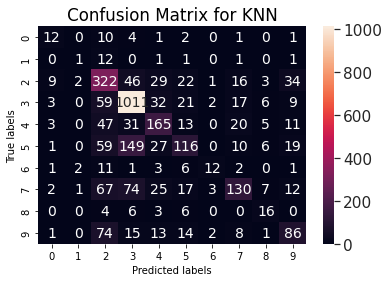

In [38]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_knn)      
df_cm = pd.DataFrame(array, range(10),range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for KNN'); 
#ax.xaxis.set_ticklabels(['Não Popular', 'Popular']); ax.yaxis.set_ticklabels(['Não Popular', 'Popular']);

### Random Forest

In [39]:
rf = RandomForestClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=10,
                           n_estimators=50,
                           n_jobs=-1)

grid = GridSearchCV(rf,parametros_rf,cv=10)

In [40]:
inicio_grid_rf = time.time()
grid.fit(x_treino,y_treino)
tempo_grid_rf = time.time()- inicio_grid_rf

In [41]:
grid.best_params_

{'n_estimators': 400}

In [42]:
grid.best_score_

0.719

#### Random Forest - Performance

In [43]:
inicio_predicao_rf = time.time()
prev_rf = grid.predict(x_teste)
tempo_predicao_rf = time.time() - inicio_predicao_rf

In [44]:
acc_res = metrics.accuracy_score(y_teste,prev_rf)
prec = metrics.precision_score(y_teste,prev_rf,average='weighted')
rec = metrics.recall_score(y_teste,prev_rf,average='weighted')
f1s = metrics.f1_score(y_teste,prev_rf,average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print(f'Precision: {prec:.2f}')
print(f'Recall:    {rec:.2f}')
print(f'F-1 Score: {f1s:.2f}')
print(f'Accuracy:  {acc_res:.2f}')
print(" ")
print(f'Tempo Grid:  {tempo_grid_rf:.2f}')
print(f'Tempo Execução:  {tempo_predicao_rf:.2f}')

Precision: 0.73
Recall:    0.72
F-1 Score: 0.71
Accuracy:  0.72
 
Tempo Grid:  100.04
Tempo Execução:  0.32


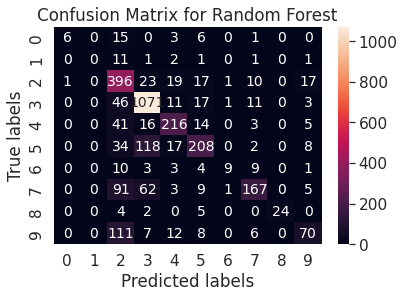

In [46]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_rf)      
df_cm = pd.DataFrame(array, range(10),range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest'); 

### Seleção de Features

In [47]:
x_treino

,Flow.Duration,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets
9844,15119395,1.836714e+02,1.190524e+00,889376.176471,3.640850e+06,15017726.0,0,14,4,1636,1141.0
1347,2,6.000000e+06,1.000000e+06,2.000000,0.000000e+00,2.0,2,2,0,12,0.0
4162,21,0.000000e+00,1.428571e+05,10.500000,1.343503e+01,20.0,1,3,0,0,0.0
4803,6662,2.521765e+04,9.006304e+02,1332.400000,2.488598e+03,5775.0,40,3,3,168,0.0
5923,5908120,1.744921e+04,1.946474e+01,51825.614035,4.806171e+05,5127291.0,0,36,79,5062,98030.0
...,...,...,...,...,...,...,...,...,...,...,...
9226,360205,1.303508e+05,1.610194e+02,6319.385965,2.854241e+04,201867.0,0,11,47,1233,45720.0
8609,146471,0.000000e+00,1.365458e+01,146471.000000,0.000000e+00,146471.0,146471,1,1,0,0.0
7117,202,0.000000e+00,9.900990e+03,202.000000,0.000000e+00,202.0,202,2,0,0,0.0
4730,1,5.099000e+09,3.000000e+06,0.500000,7.071068e-01,1.0,0,3,0,5099,0.0


In [48]:
y_treino

9844     7
1347     7
4162     7
4803     6
5923     8
        ..
9226     6
8609    15
7117     7
4730    15
4370    15
Name: classes, Length: 7000, dtype: int64

In [49]:
# Create the RFE object and rank each pixel
rfe = RFE(estimator=rf, n_features_to_select=1, step=1)

In [50]:
rfe.fit(x_treino, y_treino)

RFE(estimator=RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                                     random_state=1986),
    n_features_to_select=1)

In [51]:
#===========================================================================
# now print out the features in order of ranking
#===========================================================================
from operator import itemgetter
features = x_treino.columns.to_list()
for w, z in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(w, z)

1 Flow.IAT.Max
2 Flow.Duration
3 Total.Length.of.Fwd.Packets
4 Total.Backward.Packets
5 Flow.Packets.s
6 Flow.IAT.Mean
7 Total.Fwd.Packets
8 Flow.Bytes.s
9 Total.Length.of.Bwd.Packets
10 Flow.IAT.Std
11 Flow.IAT.Min


In [52]:
n_features_to_select = 5
rfe = RFE(rf, n_features_to_select=n_features_to_select)

### Random Forest Selecionado

In [53]:
inicio_rfe_rf = time.time()
rfe.fit(x_treino,y_treino)
tempo_rfe_rf = time.time()- inicio_rfe_rf

#### Performance

In [54]:
inicio_predicao_rf = time.time()
prev_rf = rfe.predict(x_teste)
tempo_predicao_rf = time.time() - inicio_predicao_rf

In [55]:
acc_res = metrics.accuracy_score(y_teste,prev_rf)
prec = metrics.precision_score(y_teste,prev_rf,average='weighted')
rec = metrics.recall_score(y_teste,prev_rf,average='weighted')
f1s = metrics.f1_score(y_teste,prev_rf,average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print(f'Precision: {prec:.2f}')
print(f'Recall:    {rec:.2f}')
print(f'F-1 Score: {f1s:.2f}')
print(f'Accuracy:  {acc_res:.2f}')
print(" ")
print(f'Tempo RFE:  {tempo_rfe_rf:.2f}')
print(f'Tempo Execução:  {tempo_predicao_rf:.2f}')

Precision: 0.71
Recall:    0.69
F-1 Score: 0.68
Accuracy:  0.69
 
Tempo RFE:  4.70
Tempo Execução:  0.11


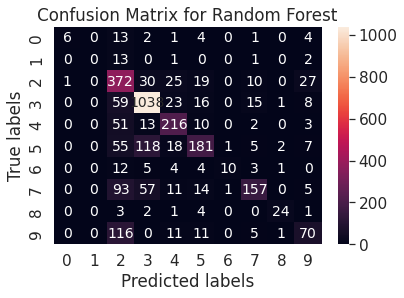

In [58]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_rf)      
df_cm = pd.DataFrame(array, range(10),range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest'); 

### Redes Neurais

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#### Construindo a Rede

In [60]:
mlp = MLPClassifier(random_state=1, max_iter=300,hidden_layer_sizes=(10,50,100,300,300,100,50,10),activation = 'relu', batch_size= 1000, solver='adam')

In [61]:
inicio_treinamento_mlp = time.time()
mlp.fit(x_treino, y_treino)
tempo_treinamento_mlp = time.time() - inicio_treinamento_mlp

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [62]:
inicio_predicao_mlp = time.time()
prev_mlp =  mlp.predict(x_teste)
tempo_predicao_mlp = time.time() - inicio_predicao_mlp

#### Performance


In [63]:
acc_res = metrics.accuracy_score(y_teste,prev_mlp)
prec = metrics.precision_score(y_teste,prev_mlp,average='weighted')
rec = metrics.recall_score(y_teste,prev_mlp,average='weighted')
f1s = metrics.f1_score(y_teste,prev_mlp,average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(f'Precision: {prec:.2f}')
print(f'Recall:    {rec:.2f}')
print(f'F-1 Score: {f1s:.2f}')
print(f'Accuracy:  {acc_res:.2f}')
print(" ")
print(f'Tempo Grid:  {tempo_treinamento_mlp:.2f}')
print(f'Tempo Execução:  {tempo_predicao_mlp:.2f}')

Precision: 0.15
Recall:    0.39
F-1 Score: 0.22
Accuracy:  0.39
 
Tempo Grid:  131.32
Tempo Execução:  0.07


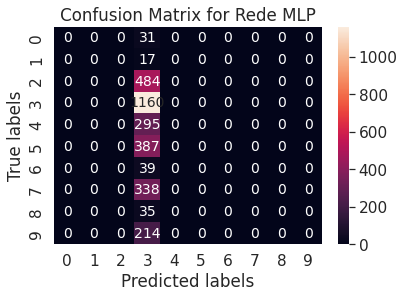

In [66]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_mlp)      
df_cm = pd.DataFrame(array, range(10),range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Rede MLP');

### Rede  Neural Keras


In [ ]:
!pip install plot_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import tensorflow as tf
print("Versão do TensorFlow:",tf.__version__)

Versão do TensorFlow: 2.8.0


In [68]:
import keras as k
print("Versão do Keras:",k.__version__)

Versão do Keras: 2.8.0


In [69]:
#Imports
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPooling1D
from keras.layers import Dense,Flatten, Input, BatchNormalization 

In [70]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import Model
from IPython.core.display import Image

#### Definição de Classes One-Hot Encoding

In [71]:
dict_classes

{0: 'AMAZON',
 5: 'GMAIL',
 6: 'GOOGLE',
 7: 'HTTP',
 8: 'HTTP_CONNECT',
 9: 'HTTP_PROXY',
 10: 'MICROSOFT',
 15: 'SSL',
 19: 'WINDOWS_UPDATE',
 21: 'YOUTUBE'}

In [72]:
dict_classes_ajustado = {0 : 0,
                         5 : 1,
                         6 : 2,
                         7 : 3,
                         8 : 4,
                         9 : 5,
                        10 : 6,
                        15 : 7,
                        19 : 8,
                        21 : 9}

In [73]:
y_treino = y_treino.map(dict_classes_ajustado)
y_teste = y_teste.map(dict_classes_ajustado)

In [74]:
y_treino

9844    3
1347    3
4162    3
4803    2
5923    4
       ..
9226    2
8609    7
7117    3
4730    7
4370    7
Name: classes, Length: 7000, dtype: int64

In [75]:
y_train_onehot = k.utils.np_utils.to_categorical(y_treino, num_classes = 10)
y_test_onehot = k.utils.np_utils.to_categorical(y_teste, num_classes = 10)

#### Construindo a Rede

In [76]:
def create_model():
  model = Sequential()
  model.add(Dense(10, activation='relu', input_dim=11))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(6,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

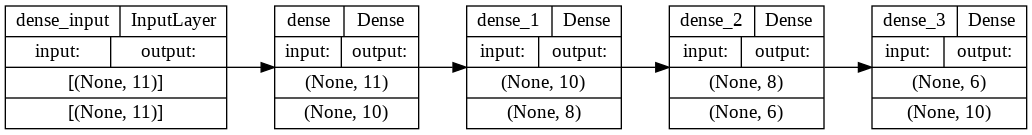

In [77]:
model=create_model()

k.utils.vis_utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

#### Treinamento

In [78]:
historico_treinamento = model.fit(x_treino, y_train_onehot, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
197/197 - 1s - loss: 854251.5000 - categorical_accuracy: 0.3392 - val_loss: 123233.2578 - val_categorical_accuracy: 0.4243 - 1s/epoch - 7ms/step
Epoch 2/500
197/197 - 0s - loss: 13996.2695 - categorical_accuracy: 0.4344 - val_loss: 34357.8477 - val_categorical_accuracy: 0.4143 - 343ms/epoch - 2ms/step
Epoch 3/500
197/197 - 0s - loss: 1608.8820 - categorical_accuracy: 0.4116 - val_loss: 612.3534 - val_categorical_accuracy: 0.3729 - 343ms/epoch - 2ms/step
Epoch 4/500
197/197 - 0s - loss: 401.2962 - categorical_accuracy: 0.3922 - val_loss: 488.7277 - val_categorical_accuracy: 0.3729 - 340ms/epoch - 2ms/step
Epoch 5/500
197/197 - 0s - loss: 275.4845 - categorical_accuracy: 0.3865 - val_loss: 370.8303 - val_categorical_accuracy: 0.3657 - 340ms/epoch - 2ms/step
Epoch 6/500
197/197 - 0s - loss: 163.9326 - categorical_accuracy: 0.3767 - val_loss: 262.8062 - val_categorical_accuracy: 0.3243 - 374ms/epoch - 2ms/step
Epoch 7/500
197/197 - 0s - loss: 83.1792 - categorical_accuracy: 0.2

In [84]:
x_teste.iloc[0]

Flow.Duration                  1.997361e+07
Flow.Bytes.s                   9.011891e-01
Flow.Packets.s                 1.501982e-01
Flow.IAT.Mean                  9.986806e+06
Flow.IAT.Std                   1.412322e+07
Flow.IAT.Max                   1.997343e+07
Flow.IAT.Min                   1.800000e+02
Total.Fwd.Packets              1.000000e+00
Total.Backward.Packets         2.000000e+00
Total.Length.of.Fwd.Packets    6.000000e+00
Total.Length.of.Bwd.Packets    1.200000e+01
Name: 9447, dtype: float64

In [86]:
inicio_predicao_mlp = time.time()
prev_mlp =  np.argmax(model.predict(x_teste), axis=-1)
tempo_predicao_mlp = time.time() - inicio_predicao_mlp

#### Performance

In [87]:
prev_mlp

array([3, 3, 3, ..., 3, 3, 3])

In [88]:
acc_res = metrics.accuracy_score(y_teste,prev_mlp)

In [89]:
prec = metrics.precision_score(y_teste,prev_mlp,average='weighted')
rec = metrics.recall_score(y_teste,prev_mlp,average='weighted')
f1s = metrics.f1_score(y_teste,prev_mlp,average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
print(f'Precision: {prec:.2f}')
print(f'Recall:    {rec:.2f}')
print(f'F-1 Score: {f1s:.2f}')
print(f'Accuracy:  {acc_res:.2f}')
print(" ")
print(f'Tempo Grid:  {tempo_treinamento_mlp:.2f}')
print(f'Tempo Execução:  {tempo_predicao_mlp:.2f}')

Precision: 0.15
Recall:    0.39
F-1 Score: 0.22
Accuracy:  0.39
 
Tempo Grid:  131.32
Tempo Execução:  0.42


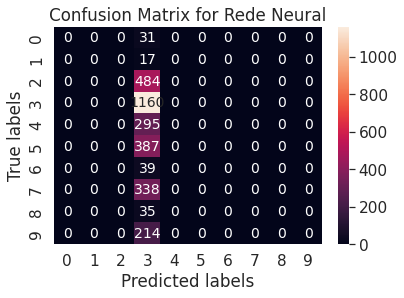

In [91]:
ax= plt.subplot()
array = confusion_matrix(y_teste, prev_mlp)      
df_cm = pd.DataFrame(array, range(10),range(10))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Rede Neural');

# Persistência


In [92]:
import joblib

In [98]:
joblib.dump(grid,'rf_model')

['rf_model']

In [99]:
model = joblib.load('rf_model')
resultados = model.predict(x_teste)

In [100]:
print(resultados)

[ 7  7  7 ... 15  7  7]


# Conclusão

<div align="justify">Foi realizada a classificação dos tráfegos de rede utilizando modelos de AM para exemplificação do minicurso apresentado no SRBC 2022. </div>


# References

<div>[1] https://www.kaggle.com/datasets/jsrojas/ip-network-traffic-flows-labeled-with-87-apps</div>